# Visualise occurence of events

In [1]:
import os

import numpy as np
import pandas as pd
import xarray as xr


import matplotlib.pyplot as plt
import cmocean.cm as cmo

In [2]:
df = pd.read_csv('1_std_events_dens_spg.csv')

In [3]:
# Add 1850 to all 'Values' to adjust
df['Adjusted_Values'] = df['Values'] + 1850

# Define bins from 1850 to 2010 in steps of 5
bins = range(1850, 2015, 5)
labels = [f"{i} - {i+4}" for i in bins[:-1]]

# Creating the bins in the DataFrame
df['Value_bins'] = pd.cut(df['Adjusted_Values'], bins=bins, labels=labels, include_lowest=True, right=False)

# Filter data based on Condition and count occurrences
value_counts_above = df[df['Condition'] == 'Above']['Value_bins'].value_counts().sort_index()
value_counts_below = df[df['Condition'] == 'Below']['Value_bins'].value_counts().sort_index()

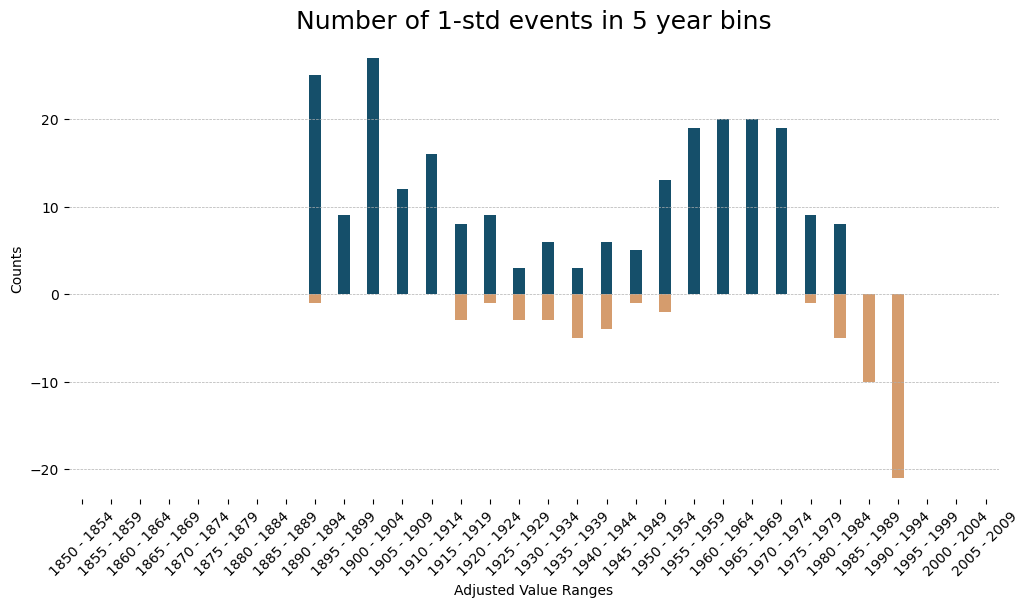

In [4]:
colors = cmo.tarn(np.linspace(0.3, 0.9, 2))

# Plot configuration
fig, ax = plt.subplots(figsize=(12, 6))
value_counts_above.plot(kind='bar', ax=ax, color=colors[1], width=0.4)
(-value_counts_below).plot(kind='bar', ax=ax, color=colors[0], alpha=0.8, width=0.4)

# Adjust title and labels
ax.set_title('Number of 1-std events in 5 year bins', fontsize=18)
ax.set_xlabel('Adjusted Value Ranges')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Removing spines (frame of the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Enhance display with grid
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/') + 'Occurences_incomplete.png', bbox_inches='tight', dpi=300)

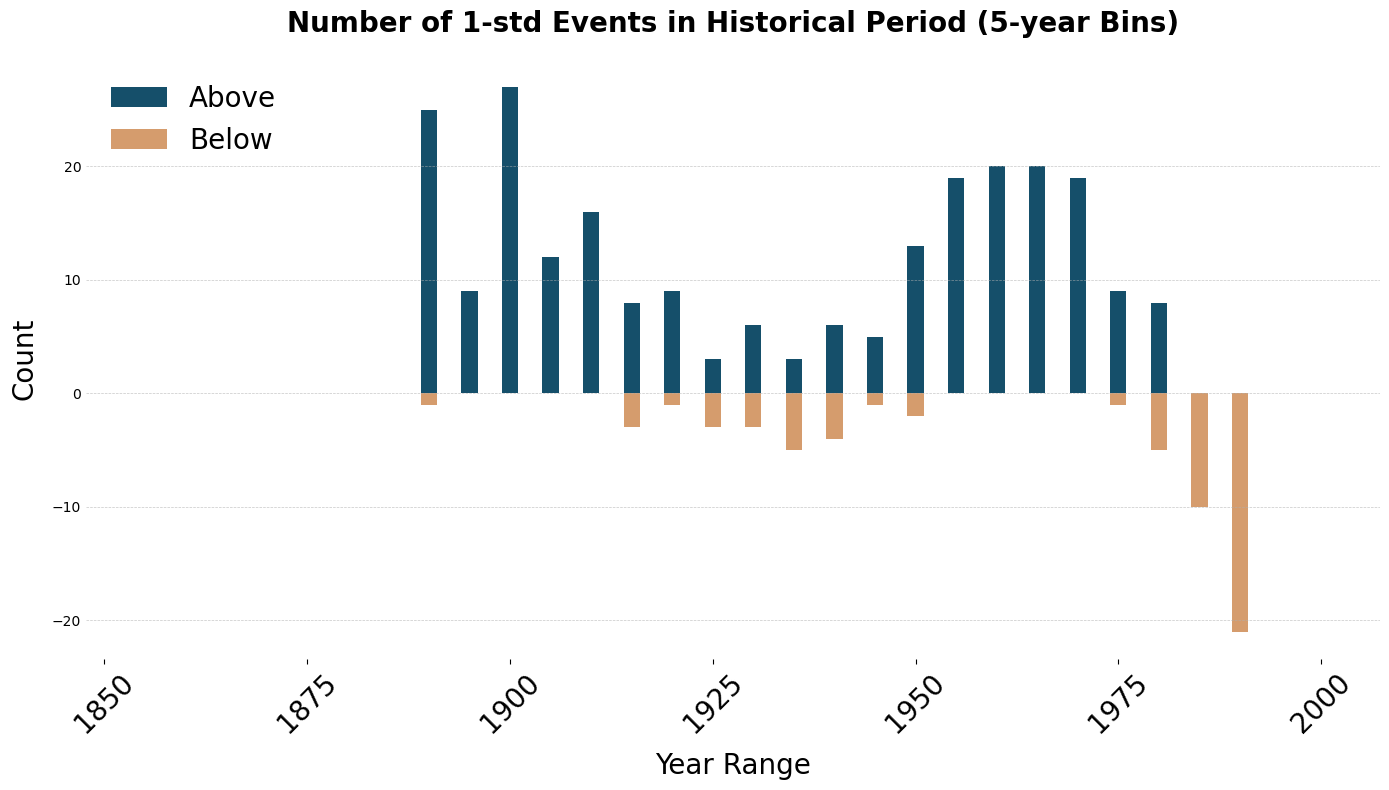

In [6]:
font_size = 20

# Configure plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar charts
bar_width = 0.4
value_counts_above.plot(kind='bar', ax=ax, color=colors[1], width=bar_width, position=0.5, label='Above')
(-value_counts_below).plot(kind='bar', ax=ax, color=colors[0], width=bar_width, position=0.5, label='Below', alpha=0.8)

# Add gridlines
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Title and labels
ax.set_title('Number of 1-std Events in Historical Period (5-year Bins)', fontsize=font_size, weight='bold', pad=20)
ax.set_xlabel('Year Range', fontsize=font_size, labelpad=10)
ax.set_ylabel('Count', fontsize=font_size, labelpad=10)

# Specify x-axis labels
desired_ticks = [1850, 1875, 1900, 1925, 1950, 1975, 2000]
ax.set_xticks([labels.index(f"{i} - {i+4}") for i in desired_ticks])
ax.set_xticklabels([str(i) for i in desired_ticks], fontsize=font_size, rotation=45)  # Rotate x-tick labels

# Add legend
ax.legend(loc='upper left', fontsize=font_size, frameon=False)

# Customize spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', length=0)
ax.yaxis.set_ticks_position('none')

# Final layout adjustments
plt.tight_layout()

# Show plot
plt.show()

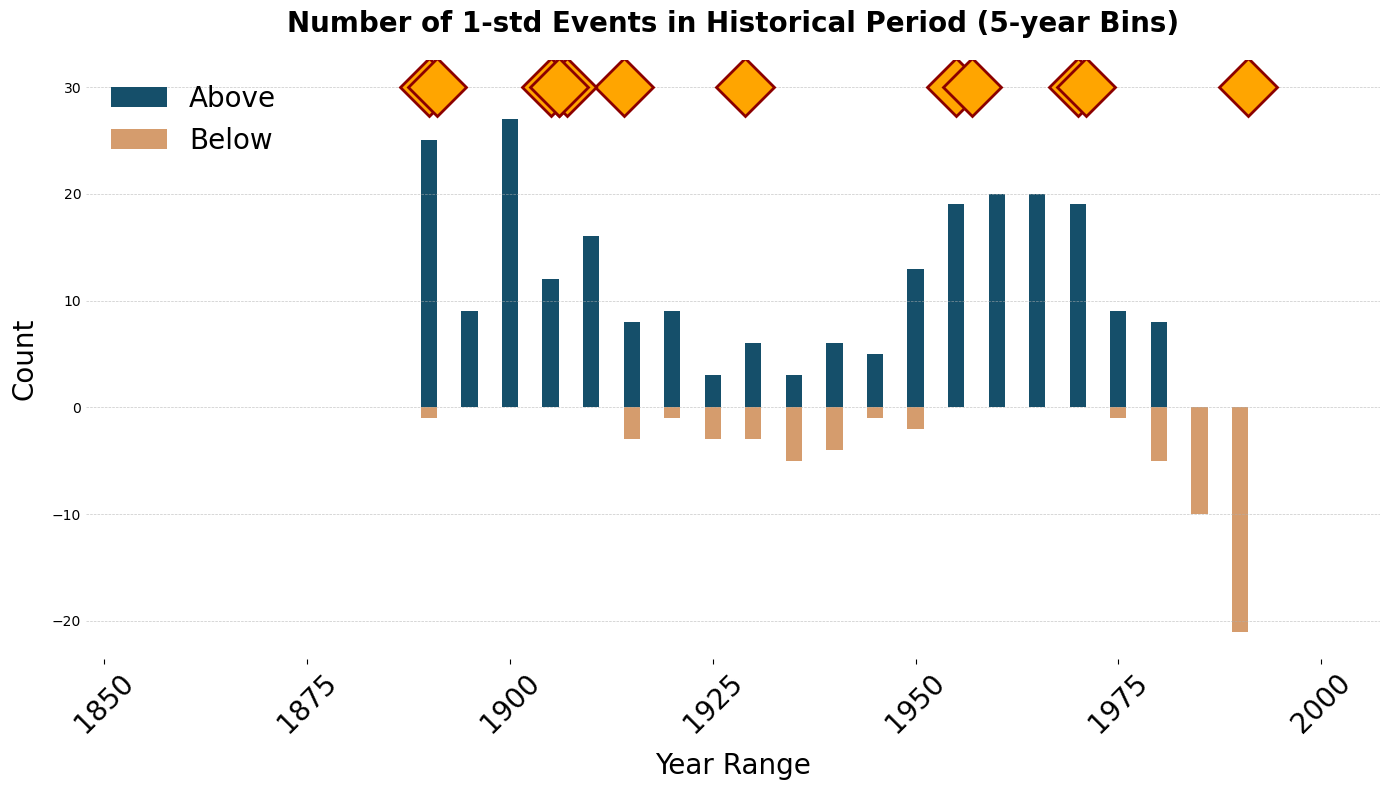

In [6]:
# Adding 1850 to given values
values = np.array([120, 105,  64, 141,  40,  56,  55, 121,  79,  41, 107,  57,  56])
new_values = values + 1850

# Colors
colors = cmo.tarn(np.linspace(0.3, 0.9, 2))

# Create shared font size
font_size = 20

# Configure plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar charts
bar_width = 0.4
value_counts_above.plot(kind='bar', ax=ax, color=colors[1], width=bar_width, position=0.5, label='Above')
(-value_counts_below).plot(kind='bar', ax=ax, color=colors[0], width=bar_width, position=0.5, label='Below', alpha=0.8)

# Add gridlines
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Title and labels
ax.set_title('Number of 1-std Events in Historical Period (5-year Bins)', fontsize=font_size, weight='bold', pad=20)
ax.set_xlabel('Year Range', fontsize=font_size, labelpad=10)
ax.set_ylabel('Count', fontsize=font_size, labelpad=10)

# Specify x-axis labels
desired_ticks = [1850, 1875, 1900, 1925, 1950, 1975, 2000]
xtick_pos = [labels.index(f"{i} - {i+4}") for i in desired_ticks]
ax.set_xticks(xtick_pos)
ax.set_xticklabels([str(i) for i in desired_ticks], fontsize=font_size, rotation=45)  # Rotate x-tick labels

# Add legend
ax.legend(loc='upper left', fontsize=font_size, frameon=False)

# Customize spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', length=0)
ax.yaxis.set_ticks_position('none')

# Add markers at specified positions
for value in new_values:
    # Determine the exact x position based on the value
    interval_start = 1850
    interval_width = 5
    bin_start = (value - interval_start) // interval_width * interval_width + interval_start
    bin_index = labels.index(f"{bin_start} - {bin_start+4}")
    exact_x_pos = bin_index + (value - bin_start) / interval_width

    # Add the marker
    ax.plot(exact_x_pos, 30, marker='D', color='orange', markersize=30,
        markeredgewidth=2, markeredgecolor=colors[1])  # Customize marker style

# Final layout adjustments
plt.tight_layout()

# Show plot
plt.show()